<a href="https://colab.research.google.com/github/bodarynka/pyton-data-analytycs/blob/main/%D0%91%D0%BE%D1%8F%D0%BA%D1%96%D0%B2%D1%81%D1%8C%D0%BA%D0%B0_%22hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('/content/yulu_rental.csv')


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

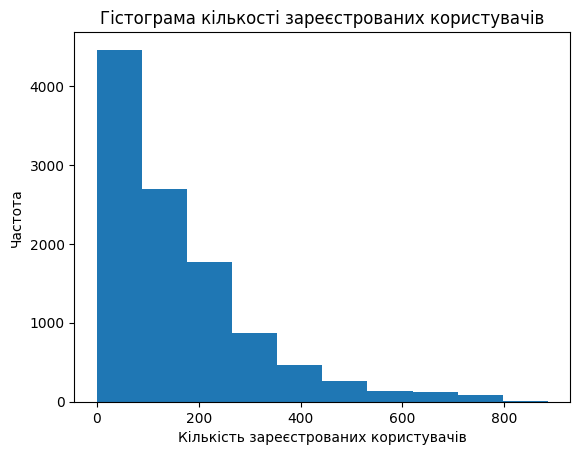

In [9]:
df['registered'].plot.hist()

# Додамо заголовок та підписи осей для кращого розуміння графіку
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Частота');

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

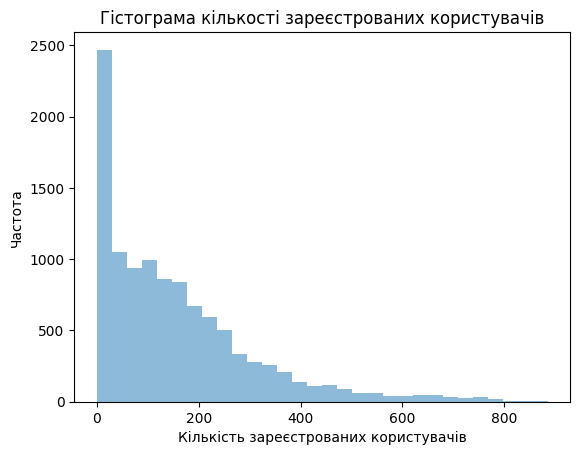

In [10]:
df['registered'].plot.hist(bins=30, alpha=0.5)

# Додаємо заголовок та підписи осей
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Частота');


Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [12]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [13]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

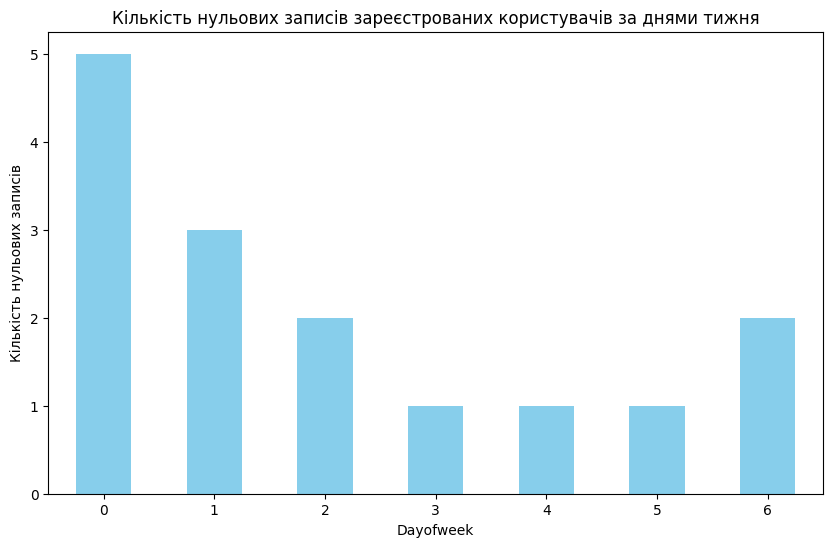

In [15]:
# Вибір записів, де кількість зареєстрованих користувачів дорівнює 0
zero_registered = df[df['registered'] == 0]

# Групування за днями тижня та підрахунок кількості нульових записів
zero_by_day = zero_registered.groupby('dayofweek').size()

# Візуалізація результатів за допомогою графіка типу "bar"
plt.figure(figsize=(10, 6))
zero_by_day.plot(kind='bar', color='skyblue')

# Додаємо заголовок та підписи до осей
plt.title('Кількість нульових записів зареєстрованих користувачів за днями тижня')
plt.xlabel('Dayofweek')
plt.ylabel('Кількість нульових записів')
plt.xticks(rotation=0);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

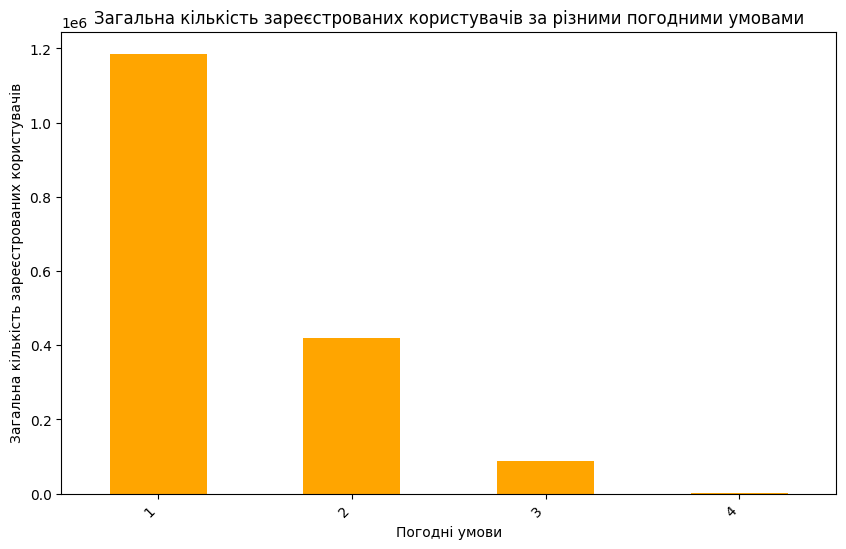

In [16]:
# Групування даних за погодними умовами та обчислення загальної кількості зареєстрованих користувачів
registered_by_weather = df.groupby('weather')['registered'].sum()

# Візуалізація результатів за допомогою стовпчастої діаграми
plt.figure(figsize=(10, 6))
registered_by_weather.plot(kind='bar', color='orange')

# Додаємо заголовок та підписи до осей
plt.title('Загальна кількість зареєстрованих користувачів за різними погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Загальна кількість зареєстрованих користувачів')
plt.xticks(rotation=45, ha='right');

Побудована візуалізація логічно відповідає очікуванням, оскільки погодні умови можуть мати значний вплив на активність користувачів. Графік допоможе зрозуміти ці закономірності та адаптувати бізнес-стратегії відповідно до погодних змін.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

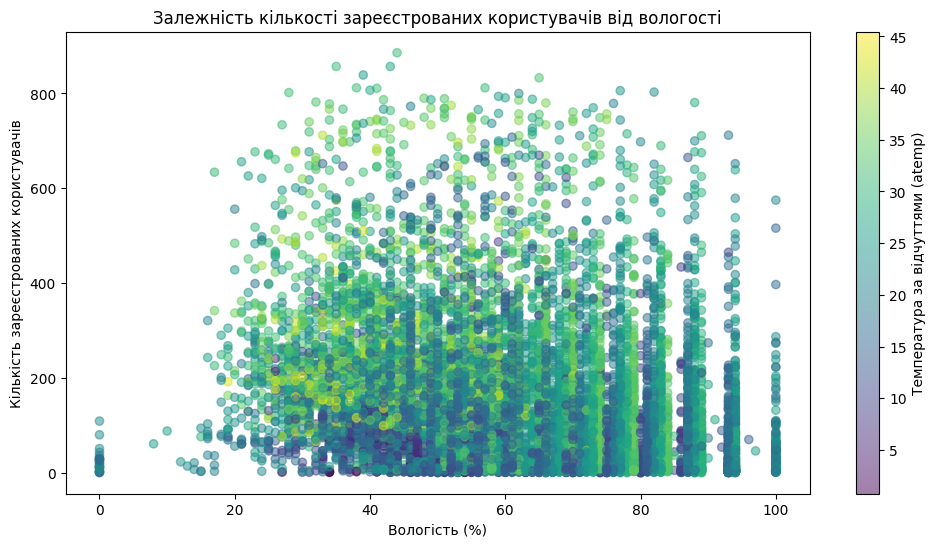

In [17]:
# Створення діаграми розсіювання між вологістю (humidity) і кількістю зареєстрованих користувачів (registered)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df['humidity'],
    y=df['registered'],
    c=df['atemp'], # Колір точок відповідає значенню температури за відчуттями
    alpha=0.5, # Прозорість точок
    cmap='viridis' # Колірна схема
)

# Додаємо колірну шкалу
plt.colorbar(scatter, label='Температура за відчуттями (atemp)')

# Додаємо підписи до осей та заголовок
plt.title('Залежність кількості зареєстрованих користувачів від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)